### Clone Dữ liệu từ github


In [1]:
!git clone https://github.com/lvphu95/Sale-Report.git

Cloning into 'Sale-Report'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 16 (delta 11), reused 16 (delta 11), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [2]:
cd /content/Sale-Report/data

/content/Sale-Report/data


### Thêm các thư viện cần thiết

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Load dữ liệu vào chương trình và merge dữ liệu 12 tháng lại

Kiểm tra danh sách các file trong thư mục data



In [31]:
files = './'
os.listdir(files)

['sales2019_6.csv',
 'sales2019_10.csv',
 'sales2019_7.csv',
 'sales2019_3.csv',
 'sales2019_9.csv',
 'sales2019_2.csv',
 'sales2019_12.csv',
 'sales2019_8.csv',
 'sales2019_4.csv',
 'sales2019_11.csv',
 '.DS_Store',
 'sales2019_5.csv',
 'sales2019_1.csv']

Merge dữ liệu file csv của 12 tháng lại

In [36]:
data = []
for file in os.listdir(files):
  if file != '.DS_Store':
    data.append(pd.read_csv(file))

#Merge dữ liệu và lưu vào biến df
df = pd.concat(data)


Kiểm tra trường dữ liệu, thông tin chung của dữ liệu

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [42]:
df.isna().sum()
#Có 545 dòng dữ liệu bị Nan

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

# Trả lời các câu hỏi của báo cáo

### 1. Tháng nào có doanh số lớn nhất và doanh số tháng đó là bao nhiêu
Bổ sung thêm cột Month vào dữ liệu

In [62]:
df['Month'] = df['Order Date'].str[:2]

Convert dữ liệu cột Quantity Ordered và Price Each sang dạng số và thêm cột Sale vào dữ liệu




In [67]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')
df['Sale'] = df['Quantity Ordered'] * df['Price Each']

In [68]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,209921,USB-C Charging Cable,1,11.950000,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06,11.950000
1,209922,Macbook Pro Laptop,1,1700.000000,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06,1700.000000
2,209923,ThinkPad Laptop,1,999.989990,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06,999.989990
3,209924,27in FHD Monitor,1,149.990005,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06,149.990005
4,209925,Bose SoundSport Headphones,1,99.989998,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06,99.989998


Kiểm tra dữ liệu trong cột Month

In [69]:
print(set(df['Month']))

{'12', '10', '08', '11', '07', '09', '01', '04', '02', '05', '06', '03'}


Loại bỏ dữ liệu bị nan và Or

In [70]:
df.dropna(how='all', inplace=True)
df = df[df['Month'] != 'Or']

In [71]:
print(set(df['Month']))

{'12', '10', '08', '11', '07', '09', '01', '04', '02', '05', '06', '03'}


Nhóm các dữ liệu theo tháng

In [117]:
saleEachMonth = df.groupby(by = 'Month').sum()['Sale']
saleEachMonth

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sale, dtype: float32

Lọc ra dữ liệu tháng có doanh số cao nhất và doanh số tháng đó

In [118]:
maxMonth = saleEachMonth[saleEachMonth == saleEachMonth.max()]

In [119]:
print('Câu trả lời của câu hỏi 1: ')
print('Tháng có doanh số cao nhất là {}, Doanh số của tháng đó là {}'.format(maxMonth.index[0], saleEachMonth.max()))

Câu trả lời của câu hỏi 1: 
Tháng có doanh số cao nhất là 12, Doanh số của tháng đó là 4613443.5


Hiển thị doanh số theo các tháng

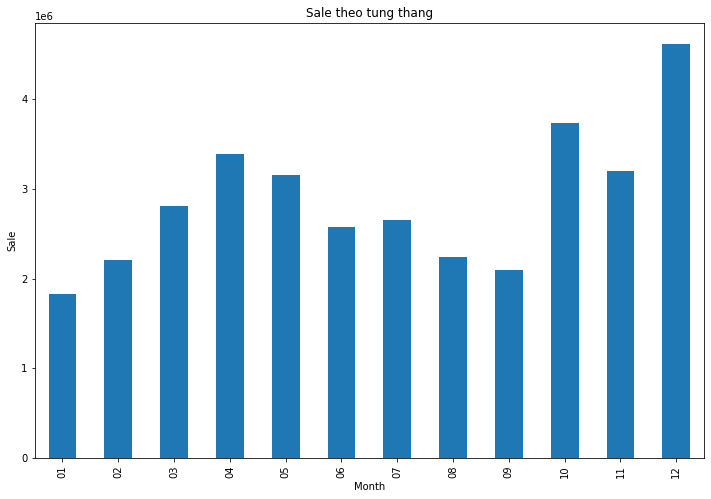

In [125]:
saleEachMonth.plot(kind = 'bar', ylabel = 'Sale', title = 'Sale theo tung thang', figsize = (12,8))
plt.show()